In [10]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
from datetime import date, timedelta
import matplotlib.gridspec as gridspec
import seaborn as sns
#import cmocean


df_test=pd.read_csv('data/Deslocamentos_03_ComDadosEArranjos.csv',encoding = "ISO-8859-1",sep=';')
df_name=pd.read_csv('data/RELATORIO_DTB_BRASIL_MUNICIPIO.csv',encoding = "ISO-8859-1",sep=';')

df_test=df_test.applymap(str)
df_test[['Total_PessTrabEstud_Desloc']] = df_test[['Total_PessTrabEstud_Desloc']].applymap(np.int64)


j_dic={
    'Rio de Janeiro':'RJ',
    'Duque de Caxias':'DdC',
    'Nova Iguaçu':'NI',
    'São João de Meriti':'SJdM',
    'Niterói':'Nt',
    'São Gonçalo':'SG',
    'Belford Roxo':'BR',
    'Nilópolis':'Ns',
    'Mesquita':'Mq',
    'Queimados':'Q',
    'Magé':'Ma'
}

state_dic={'AC': 'Acre',
 'AL': 'Alagoas',
 'AP': 'Amapá',
 'AM': 'Amazonas',
 'BA': 'Bahia',
 'CE': 'Ceará',
 'DF': 'Federal District',
 'ES': 'Espírito Santo',
 'GO': 'Goiás',
 'MA': 'Maranhão',
 'MT': 'Mato Grosso',
 'MS': 'Mato Grosso do Sul',
 'MG': 'Minas Gerais',
 'PA': 'Pará',
 'PB': 'Paraíba',
 'PR': 'Paraná',
 'PE': 'Pernambuco',
 'PI': 'Piauí',
 'RJ': 'Rio de Janeiro',
 'RN': 'Rio Grande do Norte',
 'RS': 'Rio Grande do Sul',
 'RO': 'Rondônia',
 'RR': 'Roraima',
 'SC': 'Santa Catarina',
 'SP': 'São Paulo',
 'SE': 'Sergipe',
 'TO': 'Tocantins'}


capital_dic={
    'AC': 'Rio Branco',
    'AL': 'Maceió',
    'AP': 'Macapá',
    'AM': 'Manaus',
    'BA': 'Salvador',
    'CE': 'Fortaleza',
    'DF': 'Brasília',
    'ES': 'Vitória',
    'GO': 'Goiânia',
    'MA': 'São Luís',
    'MT': 'Cuiabá',
    'MS': 'Campo Grande',
    'MG': 'Belo Horizonte',
    'PA': 'Belém',
    'PB': 'João Pessoa',
    'PR': 'Curitiba',
    'PE': 'Recife',
    'PI': 'Teresina',
    'RJ': 'Rio de Janeiro',
    'RN': 'Natal',
    'RS': 'Porto Alegre',
    'RO': 'Porto Velho',
    'RR': 'Boa Vista',
    'SC': 'Florianópolis',
    'SP': 'São Paulo',
    'SE': 'Aracaju',
    'TO': 'Palmas'
}


UF_dic={
    'AC': 12,
    'AL': 27,
    'AP': 16,
    'AM': 13,
    'BA': 29,
    'CE': 23,
    'DF': 53,
    'ES': 32,
    'GO': 52,
    'MA': 21,
    'MT': 51,
    'MS': 50,
    'MG': 31,
    'PA': 15,
    'PB': 25,
    'PR': 41,
    'PE': 26,
    'PI': 22,
    'RJ': 33,
    'RN': 24,
    'RS': 43,
    'RO': 11,
    'RR': 14,
    'SC': 42,
    'SP': 35,
    'SE': 28,
    'TO': 17
}




# function to return key for any value 
def get_key(val): 
    for key, value in my_dict.items(): 
         if val == value: 
             return key 
  
    return "key doesn't exist"








df3=pd.read_csv('data/populacao_municipio.csv')
df3[['Armenor']] = df3[['Armenor']].applymap(str)

def Pop(UF):
    
    if UF != '2211001':
        N=df3.loc[df3['Armenor']==UF].Total.sum()
    else:
        N=864845
    
    return N

    






def Mun_list(s,n):


    capital=str(df_name.loc[df_name['Nome_Município']==capital_dic[s]]['Código Município Completo'].values[0])

    df_Orig=df_test.loc[(df_test['CodMunDest']==capital)&(df_test['CodMunOrig'].str.startswith(str(UF_dic[s])))][['CodMunOrig','Total_PessTrabEstud_Desloc']]

    df_Dest=df_test.loc[(df_test['CodMunOrig']==capital)&(df_test['CodMunDest'].str.startswith(str(UF_dic[s])))][['CodMunDest','Total_PessTrabEstud_Desloc']]


    df_Orig=df_Orig.nlargest(n, 'Total_PessTrabEstud_Desloc')
    df_Dest=df_Dest.nlargest(n, 'Total_PessTrabEstud_Desloc')

    df_Orig=df_Orig.rename(columns={'CodMunOrig': 'Cod'})
    df_Dest=df_Dest.rename(columns={'CodMunDest': 'Cod'})

    df_Joint=pd.concat([df_Orig,df_Dest])


    df_Joint = df_Joint.groupby(['Cod'])[ 'Total_PessTrabEstud_Desloc'].sum().reset_index()

    df_Joint= df_Joint.nlargest(n, 'Total_PessTrabEstud_Desloc')

    return [s]+[capital]+list(df_Joint.Cod.values)

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

C:\Users\danie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


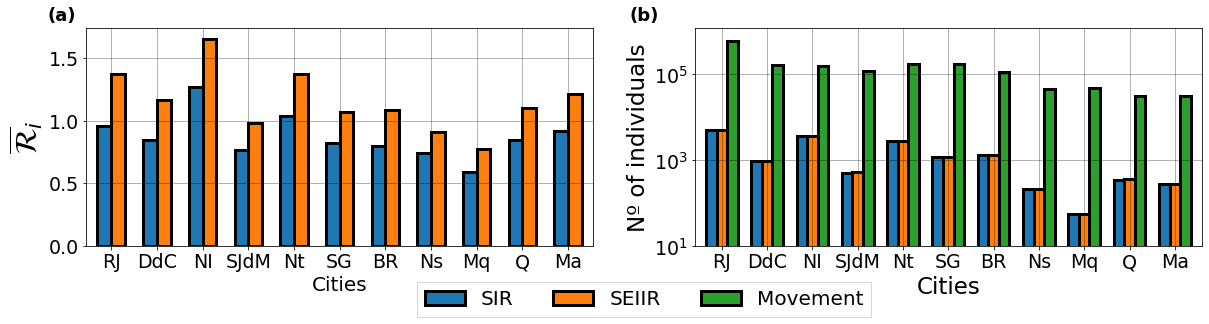

In [11]:
s='RJ'
N_Mun=10
Mun=Mun_list(s,N_Mun)[1:]
R_1={}
R_2={}

df=pd.read_csv('data\\Mun.csv')



for j in Mun:

    R_list_1=[]
    R_list_2=[]
    j_name=df_name[df_name['Código Município Completo']==int(j)]['Nome_Município'].values[0]
    for i in Mun:

        df_R=pd.read_csv('Output_SIR\\Rt_'+i+'.csv')

        R_ij=df_R[j].values
        R_ij_n=R_ij[~np.isnan(R_ij)]
        R_list_1.append(np.mean(R_ij_n))

        df_R=pd.read_csv('Output_SEIIR\\Rt_'+i+'.csv')

        R_ij=df_R[j].values
        R_ij_n=R_ij[~np.isnan(R_ij)]
        R_list_2.append(np.mean(R_ij_n))

    R_1[j_dic[j_name]]=R_list_1
    R_2[j_dic[j_name]]=R_list_2


df_1=pd.DataFrame.from_dict(R_1)
df_1['City']=list(df_1.columns) 
df_1.set_index('City', inplace = True)

df_1['sum'] = pd.Series(df_1.T.sum(axis=1).values, index=df_1.index)

df_2=pd.DataFrame.from_dict(R_2)
df_2['City']=list(df_2.columns) 
df_2.set_index('City', inplace = True)

df_2['sum'] = pd.Series(df_2.T.sum(axis=1).values, index=df_2.index)

data = [df_1["sum"], df_2["sum"]]

headers = ["SIR", "SEIIR"]

df_f = pd.concat(data, axis=1, keys=headers)

df_f1=df_f

gs = gridspec.GridSpec(nrows = 1, ncols = 2)


fig=pl.figure(figsize=(20,4))

gs.update(wspace = .2)
gs.update(hspace = 0.45)


ax1 = pl.subplot(gs[0, :1]) 
ax2 = pl.subplot(gs[0, 1:])  









df_f.plot( kind= 'bar', rot= 0,edgecolor='k',linewidth=3,width=0.6,ax=ax1 )


ax1.get_legend().remove()
ax1.tick_params(labelsize=19)

ax1.set_xlabel('Cities',fontsize=20)
ax1.set_ylabel('$\overline{\mathcal{R}}_{i}$',fontsize=30)

ax1.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3,zorder=0)



J_1={}
J_2={}
F={}

df=pd.read_csv('data\\Mun.csv')



for j in Mun:

    J_list_1=[]
    J_list_2=[]
    F_list=[]
    j_name=df_name[df_name['Código Município Completo']==int(j)]['Nome_Município'].values[0]
    for i in Mun: 

        df_J=pd.read_csv('Output_SIR\\J_'+i+'.csv')

        J_ij=df_J[j].values

        if i==j:
            J_ij=np.zeros(len(df_J[j].values))
        else:
            J_ij=df_J[j].values 

        J_ij_n=J_ij[~np.isnan(J_ij)]                
        J_list_1.append(np.sum(J_ij_n))


        df_J=pd.read_csv('Output_SEIIR\\J_'+i+'.csv')

        J_ij=df_J[j].values


        if i==j:
            J_ij=np.zeros(len(df_J[j].values))
        else:
            J_ij=df_J[j].values 

        J_ij_n=J_ij[~np.isnan(J_ij)]                
        J_list_2.append(np.sum(J_ij_n))

        flow_t=sum(map(int,df_test.loc[(df_test['CodMunDest']==j)&(df_test['CodMunOrig']==i)].Total_PessTrabEstud_Desloc))
        flow_e=sum(map(int,df_test.loc[(df_test['CodMunDest']==j)&(df_test['CodMunOrig']==i)].PessSoEstud_Desloc))

        flow_t2=sum(map(int,df_test.loc[(df_test['CodMunDest']==i)&(df_test['CodMunOrig']==j)].Total_PessTrabEstud_Desloc))
        flow_e2=sum(map(int,df_test.loc[(df_test['CodMunDest']==i)&(df_test['CodMunOrig']==j)].PessSoEstud_Desloc))


        F_list.append((flow_t+flow_t2-flow_e-flow_e2))







    J_1[j_dic[j_name]]=J_list_1
    J_2[j_dic[j_name]]=J_list_2
    F[j_dic[j_name]]=F_list

df_1=pd.DataFrame.from_dict(J_1)
df_1['City']=list(df_1.columns) 
df_1.set_index('City', inplace = True)

df_1['sum'] = pd.Series(df_1.T.sum(axis=1).values, index=df_1.index)

df_2=pd.DataFrame.from_dict(J_2)
df_2['City']=list(df_2.columns) 
df_2.set_index('City', inplace = True)

df_2['sum'] = pd.Series(df_2.T.sum(axis=1).values, index=df_2.index)

df_fl=pd.DataFrame.from_dict(F)
df_fl['City']=list(df_fl.columns) 
df_fl.set_index('City', inplace = True)

df_fl["sum"] = df_fl.sum(axis=1)


data = [df_1["sum"], df_2["sum"],df_fl["sum"]]

headers = ["SIR", "SEIIR", "Movement"]

df_f = pd.concat(data, axis=1, keys=headers)

df_f.plot( kind= 'bar', log=True ,rot= 0,edgecolor='k',linewidth=3,width=0.7,ax=ax2 )

ax2.legend(fontsize=20)
ax2.tick_params(labelsize=19)

ax2.set_xlabel('Cities',fontsize=23)
ax2.set_ylabel('Nº of individuals',fontsize=23)

ax2.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3,zorder=0)



ax1.text(-0.02, 1.1,'(a)', transform=ax1.transAxes,
      fontsize=18, fontweight='bold', va='top', ha='right')

ax2.text(-0.07, 1.1,'(b)', transform=ax2.transAxes,
      fontsize=18, fontweight='bold', va='top', ha='right')


def tick_function(X):
    V = X
    return ["%.f" % z for z in V]


ax2.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.12),
      fancybox=False, shadow=False, ncol=3, fontsize=20)


ax2.set_ylim(bottom=10)

fig.savefig('Figures\\Compare.png',bbox_inches='tight')





pl.show() # ta-da!